In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('delivery_time.csv')

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.rename(columns={'Sorting Time': 'SortingTime'}, inplace=True)
data.rename(columns={'Delivery Time': 'DeliveryTime'}, inplace=True)
data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [14]:
data.count()

DeliveryTime    21
SortingTime     21
dtype: int64

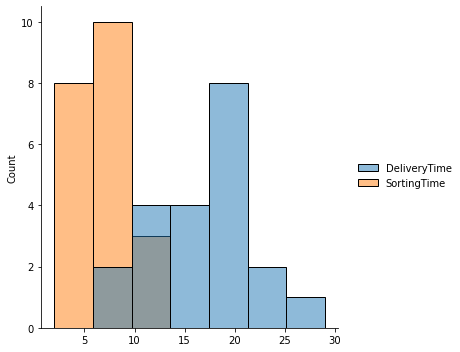

In [15]:
sns.displot(data)

In [16]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

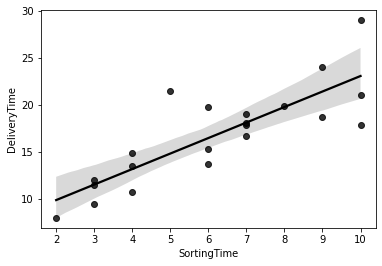

In [19]:
sns.regplot(x=data['SortingTime'],y=data['DeliveryTime'],color='black')

In [20]:
model=smf.ols('DeliveryTime~SortingTime',data=data).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        12:46:38   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
r2=model.rsquared
r2

0.6822714748417231

In [23]:
model1=smf.ols('np.log(DeliveryTime)~np.log(SortingTime)',data=data).fit()

In [24]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.772
Model:                              OLS   Adj. R-squared:                  0.760
Method:                   Least Squares   F-statistic:                     64.39
Date:                  Mon, 16 Oct 2023   Prob (F-statistic):           1.60e-07
Time:                          12:47:39   Log-Likelihood:                 10.291
No. Observations:                    21   AIC:                            -16.58
Df Residuals:                        19   BIC:                            -14.49
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.7420      0.133     13.086      0.000       1.463       2.021
np.log(SortingTime)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
r2=model1.rsquared
r2

0.77216134926874

In [26]:
model2=smf.ols('np.log(DeliveryTime)~SortingTime+pow(SortingTime,2)',data=data).fit()

In [27]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Mon, 16 Oct 2023   Prob (F-statistic):           2.20e-06
Time:                          12:48:40   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.6997      0.228      7.441      0.000       1.220       2.180
SortingTime             0.2659      0.080      3.315      0.004       0.097       0.434
pow(SortingTime, 2)    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
r2=model2.rsquared
r2

0.7648666342953728

Text(0, 0.5, 'DEliveryTime')

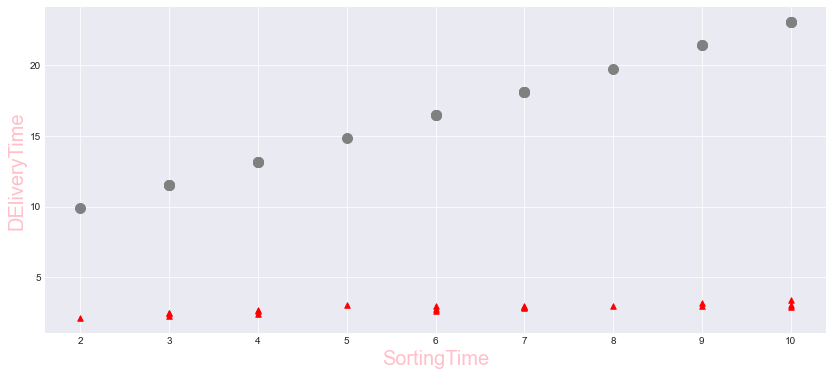

In [30]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")

plt.scatter(data["SortingTime"],np.log(data["DeliveryTime"]),color="red",s=30,marker='^')
plt.scatter(data["SortingTime"],model.fittedvalues,color="grey",s=100)


plt.xlabel("SortingTime",size=20,color="pink")
plt.ylabel("DEliveryTime",size=20,color="pink")

In [32]:

predicted = pd.DataFrame()
predicted['SortingTime'] = data.SortingTime
predicted['DeliveryTime'] = data.DeliveryTime
predicted['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted.SortingTime))
predicted

,SortingTime,DeliveryTime,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


# or in other way


In [33]:
data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [34]:
x=data['SortingTime'].values.reshape(-1,1)
y=data['DeliveryTime']

In [35]:
data.count()

DeliveryTime    21
SortingTime     21
dtype: int64

In [36]:
data.isna().sum()

DeliveryTime    0
SortingTime     0
dtype: int64

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=10)

In [38]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pred=model.predict(x_test)

In [40]:
new_Sorting=data['SortingTime'].values.reshape(-1,1)

In [42]:
predicted_Delivery=model.predict(new_Sorting)

In [43]:
predicted=pd.DataFrame()
predicted['SortingTime']=data['SortingTime']
predicted['DeliveryTime']=data['DeliveryTime']
predicted['predicted_Delivery']=pd.DataFrame(predicted_Delivery)

In [44]:
predicted

,SortingTime,DeliveryTime,predicted_Delivery
0,10,21.00,22.831465
1,4,13.50,13.592222
2,6,19.75,16.671970
3,9,24.00,21.291591
4,10,29.00,22.831465
5,6,15.35,16.671970
6,7,19.00,18.211843
7,3,9.50,12.052348
8,10,17.90,22.831465
9,9,18.75,21.291591
